## Treinamento da Aula 03 - Medidas Resumo e Histograma

### Código:

In [26]:
#Função Mágica do MatPlotLib
%matplotlib inline
#Import Pandas
import pandas as pd
#Import Matplotlib
import matplotlib.pyplot as plt
#Import - Sistema Operacional
import os
#Importando Numpy + Função específica 
from numpy import arange
import numpy as np
#Import Display
from IPython.display import display

In [27]:
#Checando Diretório 
print("Esperamos trabalhar no diretório")
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/antonioamaralegydiomartins/Desktop/Antonio amaral/GitHub - Pessoal/CD21-2/aula03


In [28]:
#Abrindo dados que serão utilizados
dados = pd.read_excel("EmpresaTV_Cod.xlsx")

#Definindo Categorias para o DataFrame
dados.PLANO = dados.PLANO.astype ("category")
dados.EC = dados.EC.astype("category")
dados.SATISFACAO = dados.SATISFACAO.astype("category")
dados.RENDA = dados.RENDA.astype("float")

#Definindo Subcategorias
dados.PLANO.cat.categories = (["A","B"]) #Seguindo a ordem [1,2]
dados.EC.cat.categories =(["Casado","Solteiro","Outros"]) #Seguindo a ordem [1,2,3]

#Definindo ordem para as Subcategorias de satisfação
dados.SATISFACAO = pd.Categorical(dados.SATISFACAO,
                                 categories = ["Muito Insatisfeito","Insatisfeito","Indiferente","Satisfeito","Muito Satisfeito"],
                                 ordered = True)

- ### *Medidas Resumo*

O Objetivo deste tópico é compreender as informações contidas em variáveis quantitativas, recorrendo ao cálculo de algumas medidas como:
- Média           `pd.mean()`
- Percentis       `pd.quantile()`
- Desvio Padrão   `pd.std()`
- Variância       `pd.var()`

In [29]:
#Criando DataFrames com Separação de Dados
dados_a = dados.loc[dados["PLANO"] == "A",:]
dados_b = dados.loc[dados["PLANO"] == "B",:]

#Criando Series com apenas a coluna de renda dos Clientes de um particular plano
renda_a = dados.loc[dados["PLANO"] == "A","RENDA"]
renda_b = dados.loc[dados["PLANO"] == "B","RENDA"]

#Outra forma de Criar as Series é a partir da alteração dos DataFrames Dados_a e Dados_b
renda_a = dados_a["RENDA"]
renda_b = dados_b["RENDA"]

In [30]:
#Imprimindo DataFrame A
dados_a.head(3)

,CLIENTE,PLANO,EC,SATISFACAO,RENDA
0,1,A,Casado,Muito Satisfeito,21.4
1,2,A,Solteiro,Muito Satisfeito,17.2
2,3,A,Outros,Muito Satisfeito,15.6


In [31]:
#Imprimindo Series A
renda_a.head(3)

0    21.4
1    17.2
2    15.6
Name: RENDA, dtype: float64

O Comando abaixo pode parecer complexo, por utilizar for de uma maneira diferente da antes vista em Python. Neste caso o For ira apresentar sempre dois títulos - colocados anteriormente, neste caso Plano A e Plano B - e ira varias os números presentes nas series inseridas - neste caso as series são renda_a e renda_b - e a variavel que guardará estes dados é a Var_quanti; que como será possível perceber consegue ter aplicada a si diversas funções como:`.mean`,`.min`,`.quantile`,`.median`,`.max`,`.var`,`.std`.

As quais recebem sempre a quantidade de casas fracionarias, ao final, e no caso de Quantile recebem as porcentagens ou quantis.

In [32]:
for title, var_quanti in (("Plano A",renda_a),("Plano B", renda_b)):
    print('-' * 5 * len(title))
    print(title)
    print('-' * 5 * len(title))
    print(f'contagem               = {len(var_quanti)}')
    print(f'média                  = {var_quanti.mean():.3f}')
    print(f'mínimo                 = {var_quanti.min():.3f}')
    print(f'primeiro quartil (Q1)  = {var_quanti.quantile(q=0.25):.3f}')
    print(f'mediana          (Q2)  = {var_quanti.median():.3f}')
    print(f'terceiro quartil (Q3)  = {var_quanti.quantile(q=0.75):.3f}')
    print(f'máximo                 = {var_quanti.max():.3f}')
    print(f'variância amostral     = {var_quanti.var():.3f}')
    print(f'desvio padrão amostral = {var_quanti.std():.3f}')
    print()

-----------------------------------
Plano A
-----------------------------------
contagem               = 46
média                  = 10.422
mínimo                 = 0.700
primeiro quartil (Q1)  = 7.475
mediana          (Q2)  = 10.350
terceiro quartil (Q3)  = 13.200
máximo                 = 21.400
variância amostral     = 19.941
desvio padrão amostral = 4.466

-----------------------------------
Plano B
-----------------------------------
contagem               = 36
média                  = 5.689
mínimo                 = 0.600
primeiro quartil (Q1)  = 4.150
mediana          (Q2)  = 5.150
terceiro quartil (Q3)  = 6.375
máximo                 = 19.200
variância amostral     = 10.847
desvio padrão amostral = 3.293



- ### *Histograma*

Uma vez que já vimos como separar um DataFrame em diversos DataFrames - divididos por categorias; E vimos tambem como coletar os dados de Series, retiradas do Dataframe secundário, e analisá-los utilizando funções.

Agora veremos Histograma, que é um gráfico adequado para representar as frequências - contagem ou relativas - de variáveis quantitativas.

`Eixo X:` Representação da grandeza da variável quantitativa que está sendo estudada

`Eixo Y:` Frequência absoluta (contagem) ou densidade.

- #### Amplitudes iguais

Neste caso estamos tratando de Renda, considerando assim uma amplitude igual de tamanho 3.5

In [33]:
#Import Numpy - Arange
from numpy import arange
#Definindo Faixas de Amplitude
faixa1 = arange(0.5,22,3.5)
#Observando Faixas
faixa1

array([ 0.5,  4. ,  7.5, 11. , 14.5, 18. , 21.5])

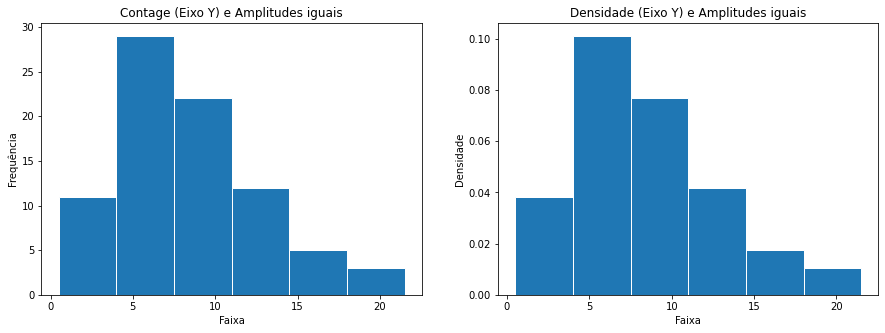

In [34]:
#Criando Histograma
plt.figure(figsize = (15,5))

#Utilizaremos Subplot para conseguir plotar diversos gráficos
plt.subplot(121)
plt.hist(dados.RENDA,bins = faixa1, edgecolor = "white")
plt.title("Contage (Eixo Y) e Amplitudes iguais")
plt.ylabel ("Frequência")
plt.xlabel ("Faixa")

plt.subplot(122)
plt.hist(dados.RENDA, bins = faixa1, edgecolor = "white", density = True)
plt.title ("Densidade (Eixo Y) e Amplitudes iguais")
plt.ylabel ("Densidade")
plt.xlabel ("Faixa")

plt.show()

- #### Amplitudes desiguais

In [35]:
#Definindo Faixa de Amplitude Desigual
faixa2 = [0.5,4,7.5,11,21.5]
#Observando Faixa
faixa2

[0.5, 4, 7.5, 11, 21.5]

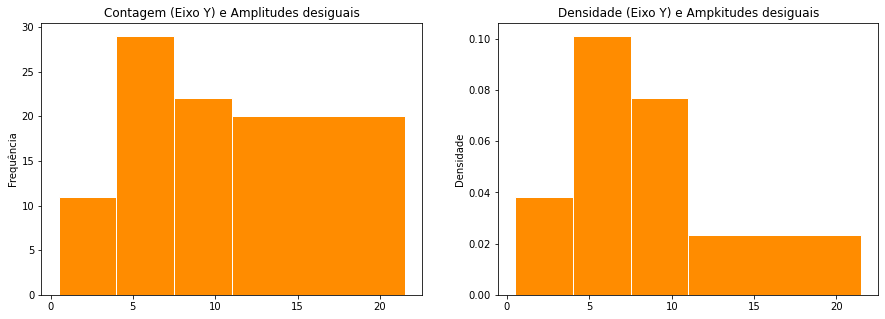

In [36]:
#Criando Histograma
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.hist(dados.RENDA, bins=faixa2, edgecolor="white",color="darkorange")
plt.title("Contagem (Eixo Y) e Amplitudes desiguais")
plt.ylabel("Frequência")

plt.subplot(122)
plt.hist(dados.RENDA, bins=faixa2, edgecolor="white", color="darkorange", density=True)
plt.title ("Densidade (Eixo Y) e Ampkitudes desiguais")
plt.ylabel("Densidade")

plt.show()